<H1>Лабораторна робота 4</H1>

In [2]:
#імпортуємо необхідні бібліотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

Зчитуємо данні

In [3]:
df = pd.read_csv('./household_power_consumption.txt', delimiter=';')

C:\Temp\ipykernel_7428\668673895.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./household_power_consumption.txt', delimiter=';')


Бачимо сповіщення про те що необхідно перетворити типи даних

In [55]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

Дійсно, всі стовпці мають тип object

Перетворимо колонки з датою та часом у відповідні типи, а все інше - на числа типу float64

In [57]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Time'] = pd.to_datetime(df['Time'], format= '%H:%M:%S').dt.time
for colname in df.columns[2:]:
    df[colname] = pd.to_numeric(df[colname], errors='coerce')

Тепер можемо видалити рядки з пропущеними даними

In [59]:
df.dropna(inplace=True)

In [60]:
len(df)

2049280

In [61]:
df.dtypes

Date                     datetime64[ns]
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

Бачимо, що тепер типи даних є правильними

In [40]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


<H2>Завдання першого рівня</H2>

Завдання 1

In [62]:
def task1(df):
    return df[df['Global_active_power'] > 5]

In [63]:
task1(df)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
11,2006-12-16,17:35:00,5.412,0.470,232.78,23.2,0.0,1.0,17.0
12,2006-12-16,17:36:00,5.224,0.478,232.99,22.4,0.0,1.0,16.0
...,...,...,...,...,...,...,...,...,...
2069356,2010-11-22,18:40:00,5.408,0.150,231.50,23.6,48.0,0.0,0.0
2069357,2010-11-22,18:41:00,5.528,0.144,232.48,24.6,53.0,0.0,0.0
2071586,2010-11-24,07:50:00,5.172,0.050,235.18,22.0,0.0,38.0,17.0
2071587,2010-11-24,07:51:00,5.750,0.000,234.40,24.6,0.0,39.0,17.0


Завдання 2

In [64]:
def task2(df):
    return df[df['Voltage'] > 235]

In [65]:
task2(df)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
14,2006-12-16,17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


Завдання 3

In [66]:
def task3(df):
    return df[(df['Global_intensity'] >= 19) & (df['Global_intensity'] <= 20) & (df['Sub_metering_2'] > df['Sub_metering_3'])]

In [67]:
task3(df)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
45,2006-12-16,18:09:00,4.464,0.136,234.66,19.0,0.0,37.0,16.0
460,2006-12-17,01:04:00,4.582,0.258,238.08,19.6,0.0,13.0,0.0
464,2006-12-17,01:08:00,4.618,0.104,239.61,19.6,0.0,27.0,0.0
475,2006-12-17,01:19:00,4.636,0.140,237.37,19.4,0.0,36.0,0.0
476,2006-12-17,01:20:00,4.634,0.152,237.17,19.4,0.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...
2071589,2010-11-24,07:53:00,4.666,0.000,235.72,19.8,0.0,39.0,17.0
2071590,2010-11-24,07:54:00,4.694,0.000,236.78,19.8,0.0,39.0,18.0
2071591,2010-11-24,07:55:00,4.602,0.000,237.08,19.4,0.0,40.0,17.0
2071592,2010-11-24,07:56:00,4.536,0.000,237.03,19.0,0.0,39.0,17.0


Завдання 4

In [75]:
def task4(df):
    sample = df.sample(n=500000)
    sample['mean_metering'] = np.mean(df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']], axis=1)
    return sample

In [76]:
task4(df)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,mean_metering
1079732,2009-01-04,12:56:00,1.194,0.000,243.16,5.4,0.0,4.0,0.0,1.333333
516127,2007-12-10,03:31:00,0.218,0.000,244.85,0.8,0.0,0.0,0.0,0.000000
1905583,2010-08-01,01:07:00,0.258,0.118,240.57,1.2,0.0,0.0,1.0,0.333333
969442,2008-10-19,22:46:00,0.864,0.090,244.37,3.6,0.0,0.0,1.0,0.333333
1405998,2009-08-19,02:42:00,0.316,0.220,241.54,1.6,0.0,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...
406730,2007-09-25,04:14:00,0.114,0.000,241.73,0.6,0.0,0.0,0.0,0.000000
1444010,2009-09-14,12:14:00,0.770,0.110,242.41,3.2,0.0,0.0,0.0,0.000000
711613,2008-04-23,21:37:00,1.676,0.128,236.44,7.0,0.0,1.0,1.0,0.666667
544062,2007-12-29,13:06:00,4.382,0.606,240.19,18.4,39.0,1.0,18.0,19.333333


Завдання 5

In [1]:
def task5(df):
    filtered = df[(df['Time'] >= datetime.time(18, 0)) & (df['Global_active_power'] > 6)]
    filtered = filtered[(filtered['Sub_metering_2'] > filtered['Sub_metering_1']) & (filtered['Sub_metering_2'] > filtered['Sub_metering_3'])]

    first_half = filtered.loc[:len(filtered)//2]
    result1 = first_half.loc[::3]
    
    second_half = filtered.loc[len(filtered)//2:]
    result2 = second_half.loc[::4]
    return pd.concat([result1, result2])

In [87]:
task5(df)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
41,2006-12-16,18:05:00,6.052,0.192,232.93,26.2,0.0,37.0,17.0
44,2006-12-16,18:08:00,6.308,0.116,232.25,27.0,0.0,36.0,17.0
3007,2006-12-18,19:31:00,6.158,0.442,229.08,27.0,0.0,36.0,0.0
17498,2006-12-28,21:02:00,8.088,0.262,235.50,34.4,1.0,72.0,17.0
17502,2006-12-28,21:06:00,7.184,0.000,235.70,30.4,2.0,73.0,17.0
...,...,...,...,...,...,...,...,...,...
2066465,2010-11-20,18:29:00,6.180,0.306,229.92,27.2,13.0,35.0,16.0
2066469,2010-11-20,18:33:00,6.262,0.382,229.72,27.6,13.0,35.0,16.0
2066473,2010-11-20,18:37:00,6.310,0.412,229.89,27.8,15.0,35.0,16.0
2066477,2010-11-20,18:41:00,6.282,0.360,229.21,27.8,14.0,35.0,16.0


<H2>Завдання другого рівня</H2>

Обраним датасетом є Iris. Він містить 150 записів про квіти трьох типів - <i>Iris Setosa</i>, <i>Iris Versicolour</i> та <i>Iris</i> і має 5 змінних:
<ul>
    <li><b>sepal length</b> - довжина листків</li>
    <li><b>sepal width</b> - ширина листків</li>
    <li><b>petal length</b> - довжина пелюстки</li>
    <li><b>petal width</b> - ширина пелюстки</li>
    <li><b>class</b> - вид рослини (один з трьох)</li>
</ul>

In [5]:
df_iris = pd.read_csv('./iris.data', index_col=False, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [6]:
len(df_iris)

150

In [8]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Завдання 1

Датасет не містить зниклих даних

Завдання 2

Пронормуємо кожну числову змінну в датасеті

In [10]:
def norm(df, columns):
    df_norm = df.copy()
    for column in columns:
        df_norm[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    return df_norm

In [12]:
df_norm = norm(df_iris, df_iris.columns[:4])
df_norm

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Iris-virginica
146,0.555556,0.208333,0.677966,0.750000,Iris-virginica
147,0.611111,0.416667,0.711864,0.791667,Iris-virginica
148,0.527778,0.583333,0.745763,0.916667,Iris-virginica


Завдання 3

In [15]:
def hist(df, bins=None):
    plt.hist(df['sepal_length'], bins=bins)
    plt.title('Гістограма довжини листків')
    plt.xlabel('Довжина листка')
    plt.ylabel('Кількість записів')
    plt.grid()

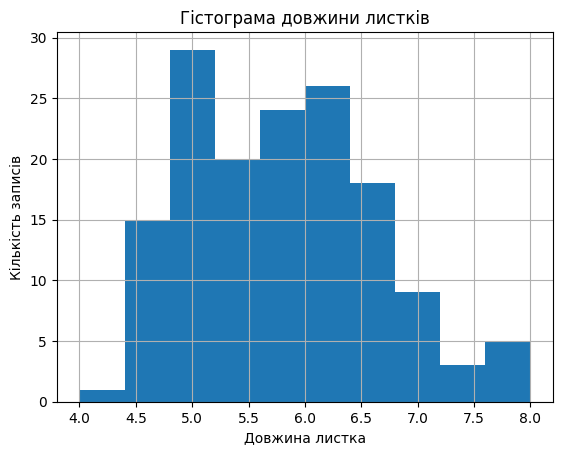

In [24]:
hist(df_iris, np.arange(4, 8.01, 0.4))

Завдання 4

Text(0, 0.5, 'Довжина пелюстки')

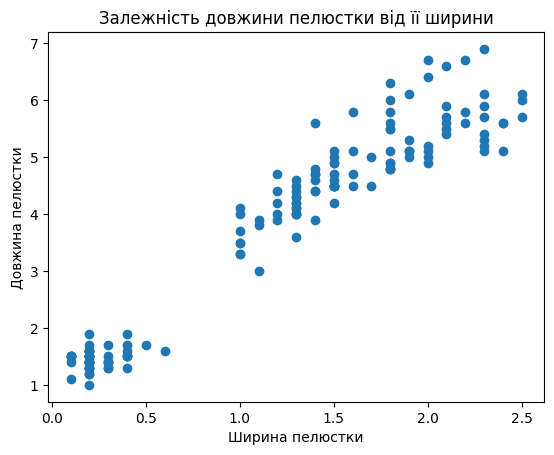

In [7]:
plt.scatter(df_iris['petal_width'], df_iris['petal_length'])
plt.title('Залежність довжини пелюстки від її ширини')
plt.xlabel('Ширина пелюстки')
plt.ylabel('Довжина пелюстки')

Завдання 5

Рахуємо коефіцієнт Пірсона для довжини пелюстки та її ширини

In [8]:
coorr_matrix = np.corrcoef(df_iris[['petal_length', 'petal_width']].T)
corr_coeff = coorr_matrix[0, 1]
print('Коефіцієнт кореляції між довжиною пелюстки та її шириною:', corr_coeff)

Коефіцієнт кореляції між довжиною пелюстки та її шириною: 0.9627570970509659


Коефіцієнт кореляції близький до 1. Це означає, що при збільшенні ширини пелюстки збільшується і її довжина. Це також можна помітити на графіку

Завдання 6

Застосуємо One Hot Encoding для виду рослини

In [34]:
def add_one_hot(df, column):
    for value in df[column].unique():
        df[value] = pd.to_numeric(df[column] == value)

In [35]:
add_one_hot(df_iris, 'class')

In [37]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,True,False,False
1,4.9,3.0,1.4,0.2,Iris-setosa,True,False,False
2,4.7,3.2,1.3,0.2,Iris-setosa,True,False,False
3,4.6,3.1,1.5,0.2,Iris-setosa,True,False,False
4,5.0,3.6,1.4,0.2,Iris-setosa,True,False,False


Завдання 7

Text(0.5, 0, 'Довжина стебла')

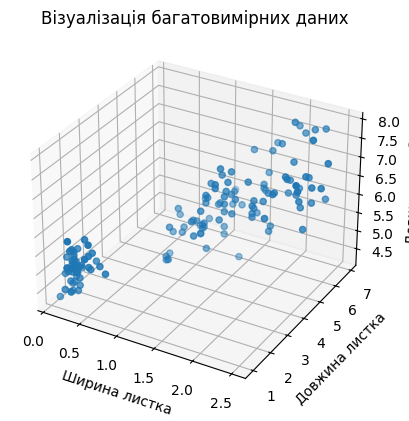

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_iris['petal_width'], df_iris['petal_length'], df_iris['sepal_length'])
ax.set_title('Візуалізація багатовимірних даних')
ax.set_xlabel('Ширина листка')
ax.set_ylabel('Довжина листка')
ax.set_zlabel('Довжина стебла')